In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('Resources/diabetic_data.csv')
diabetes

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
# Drop encounter_id column, weight column, payer_code column, and medical_specialty column
diabetes = diabetes.drop(columns=['encounter_id','weight', 'payer_code', 'medical_specialty', 'citoglipton', 'examide'])
diabetes

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [6]:
diabetes['readmitted'] = diabetes['readmitted'] != 'NO'
diabetes

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,False
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,True
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,False
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,False
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,Down,No,No,No,No,No,Ch,Yes,True
101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,...,No,Steady,No,No,No,No,No,No,Yes,False
101763,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,...,No,Down,No,No,No,No,No,Ch,Yes,False
101764,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,...,No,Up,No,No,No,No,No,Ch,Yes,False


In [7]:
diabetes.groupby('race').count()

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,,,,,,,,,,,,,,,,,,,,,
?,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,...,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273
AfricanAmerican,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,...,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210
Asian,641,641,641,641,641,641,641,641,641,641,...,641,641,641,641,641,641,641,641,641,641
Caucasian,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,...,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099
Hispanic,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,...,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037
Other,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,...,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506


In [8]:
diabetes.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide         

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [11]:
diabetes['readmitted'] = diabetes['readmitted'].astype(int)
y = diabetes['readmitted']

In [45]:
X = diabetes.drop(columns=['readmitted'])
X = pd.get_dummies(X)

In [46]:
le = LabelEncoder()
y = le.fit_transform(y)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [50]:
print(f"Training Data Score: {dt.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {dt.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.5826585960223253


In [51]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

print(f"Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr.score(X_test_scaled, y_test)}")

Training Data Score: 0.6487081389864263
Testing Data Score: 0.6258548856221995


In [56]:
inertia = []
k = list(range(1, 11))
for i in k:
    km = KMeans(n_clusters=i, n_init='auto', random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df 

,k,inertia
0,1,1.523837e+20
1,2,3.919251e+19
2,3,2.170436e+19
3,4,1.249058e+19
4,5,8.603511e+18
5,6,5.660132e+18
6,7,3.360579e+18
7,8,2.433678e+18
8,9,1.926239e+18
9,10,1.568920e+18


<Axes: xlabel='k'>

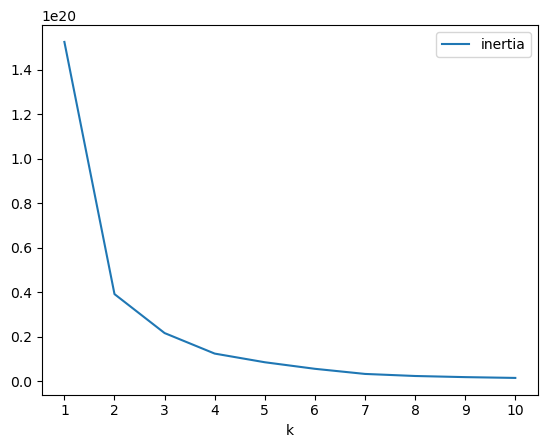

In [57]:
elbow_df.plot('k', 'inertia', xticks=k)

In [58]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.7660106912635606
Testing Data Score: 0.5524329848282368
